<a href="https://colab.research.google.com/github/rhodes-byu/cs180-winter25/blob/main/notebooks/09-kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a><p><b>After clicking the "Open in Colab" link, copy the notebook to your own Google Drive before getting started, or it will not save your work</b></p>

# K-Means: Fitting and Evaluation

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs, make_classification
from sklearn.metrics import silhouette_score
import seaborn as sns

## Case 1: Simple Blobs

In [3]:
# Generate synthetic dataset with 4 centers
X, labels = make_blobs(n_samples = 500, centers = 4, cluster_std = 1.0, random_state = 42)

In [4]:
X.shape

(500, 2)

In [5]:
labels

array([3, 2, 1, 0, 2, 2, 3, 2, 1, 2, 1, 0, 1, 0, 2, 1, 0, 3, 3, 0, 1, 0,
       1, 3, 3, 2, 2, 3, 3, 0, 2, 0, 0, 0, 2, 2, 1, 1, 3, 3, 2, 1, 0, 0,
       0, 1, 1, 1, 2, 3, 2, 0, 3, 2, 1, 0, 0, 3, 2, 3, 3, 0, 2, 3, 1, 2,
       2, 3, 1, 2, 1, 2, 2, 3, 0, 3, 0, 2, 1, 0, 2, 1, 2, 0, 3, 3, 3, 3,
       1, 0, 3, 2, 1, 2, 1, 3, 0, 1, 0, 3, 1, 1, 1, 3, 3, 0, 0, 3, 0, 3,
       2, 3, 3, 3, 3, 2, 1, 3, 2, 2, 0, 1, 2, 1, 3, 1, 1, 2, 2, 3, 3, 1,
       1, 2, 1, 3, 3, 3, 1, 1, 2, 3, 1, 1, 2, 3, 3, 0, 0, 0, 2, 2, 1, 1,
       0, 3, 0, 3, 2, 2, 3, 3, 1, 1, 2, 0, 1, 2, 3, 3, 2, 0, 0, 3, 3, 0,
       0, 2, 2, 2, 0, 3, 0, 0, 3, 3, 0, 1, 0, 2, 2, 3, 3, 2, 0, 2, 0, 0,
       3, 2, 0, 0, 2, 3, 1, 3, 2, 1, 1, 3, 3, 2, 3, 0, 0, 2, 0, 3, 0, 1,
       1, 0, 3, 0, 1, 0, 0, 2, 2, 1, 2, 1, 0, 2, 3, 2, 0, 2, 1, 1, 1, 2,
       0, 1, 3, 3, 1, 0, 0, 2, 0, 0, 0, 0, 1, 1, 3, 0, 2, 1, 0, 0, 3, 0,
       2, 2, 1, 0, 1, 2, 0, 0, 1, 3, 0, 0, 0, 1, 3, 2, 0, 1, 1, 0, 2, 0,
       1, 3, 1, 2, 2, 0, 0, 1, 3, 1, 3, 1, 2, 1, 2,

Text(0.5, 1.0, 'Scatter Plot of Data Generated by make_blobs')

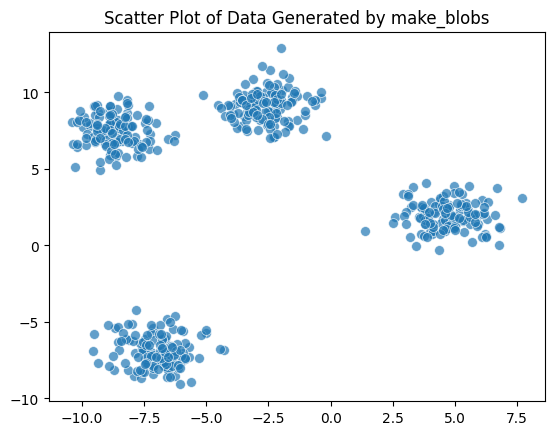

In [6]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], s=50, alpha=0.7)
plt.title('Scatter Plot of Data Generated by make_blobs')


### Selection Criterion: WCSS

In [7]:
# List to store WCSS values for each k
wcss = []

# Run k-means with k values from 1 to 10 and calculate WCSS
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, n_init = 'auto', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # inertia_ is the WCSS for the current k



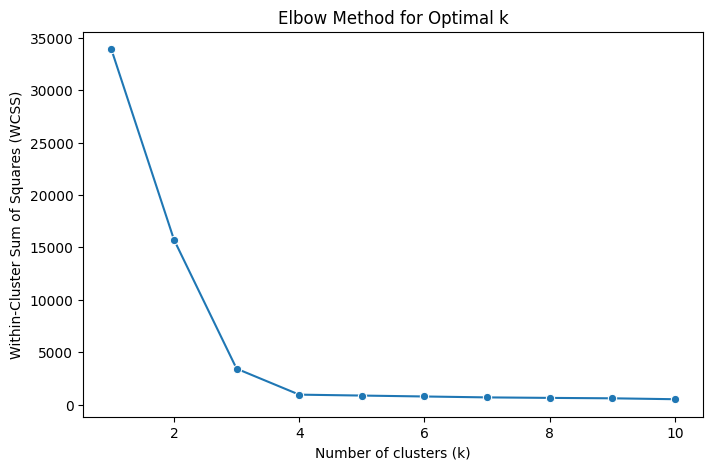

In [8]:
# Plot the WCSS values for each k to find the "elbow" point using seaborn
plt.figure(figsize=(8, 5))
sns.lineplot(x = range(1, 11), y = wcss, marker = 'o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

### Selection Criterion: Silhouette Score

In [9]:
# List to store silhouette scores
silhouette_scores = []

# Range of clusters to test
range_k = range(2, 11)

# Compute silhouette scores for each number of clusters
for k in range_k:
    kmeans = KMeans(n_clusters = k, n_init = 'auto', random_state = 42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For k = {k}, the average silhouette score is: {silhouette_avg:.3f}")

For k = 2, the average silhouette score is: 0.596
For k = 3, the average silhouette score is: 0.761
For k = 4, the average silhouette score is: 0.791
For k = 5, the average silhouette score is: 0.688
For k = 6, the average silhouette score is: 0.560
For k = 7, the average silhouette score is: 0.471
For k = 8, the average silhouette score is: 0.443
For k = 9, the average silhouette score is: 0.429
For k = 10, the average silhouette score is: 0.345


In [ ]:
# Plot silhouette scores using seaborn
plt.figure(figsize=(8, 6))
sns.lineplot(x = range_k, y = silhouette_scores, marker = 'o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Various Numbers of Clusters")
plt.show()

In [ ]:
k = 4
kmeans = KMeans(n_clusters = k, random_state = 42)
kmeans.fit(X)
cluster_labels = kmeans.predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, s=50, cmap='viridis')
plt.title('Scatter Plot of Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

## Case 2: Make Classification

In [11]:
X, labels = make_classification(n_samples = 500, n_features = 4, n_classes = 3,
                                n_clusters_per_class = 1, n_informative = 3, n_redundant = 0, 
                                class_sep = 2, random_state = 42)

In [12]:
df = pd.DataFrame(X, columns = ['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4'])
df['Labels'] = labels
df['Labels'] = df['Labels'].astype(str)

In [ ]:
# Create a PairGrid
sns.pairplot(df, hue = 'Labels')

In [ ]:
# List to store silhouette scores
silhouette_scores = []

# Range of clusters to test
range_k = range(2, 11)

# Compute silhouette scores for each number of clusters
for k in range_k:
    kmeans = KMeans(n_clusters = k, n_init = 'auto', random_state = 42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For k = {k}, the average silhouette score is: {silhouette_avg:.3f}")

print('Best k: ', silhouette_scores.index(max(silhouette_scores)) + 2)

In [15]:
kmeans = KMeans(n_clusters = 3, n_init = 'auto', random_state = 42)
cluster_labels = kmeans.fit_predict(X)

#### Note: The cluster labels do not correspond to the true labels, but still align well with the points.

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (16, 6))

sns.scatterplot(data = df, x = 'Feature 3', y = 'Feature 4', s = 50, alpha = 0.7, hue = 'Labels', ax = ax[0])
ax[0].set_title('True Labels')


sns.scatterplot(data = df, x = 'Feature 3', y = 'Feature 4', s = 50, alpha = 0.7, hue = pd.Categorical(cluster_labels), ax = ax[1])
ax[1].set_title('Cluster Labels')

## Case 3: Penguins ... Again!

In [17]:
penguins = sns.load_dataset('penguins')
penguins = penguins.dropna()

In [ ]:
penguins.head()

In [ ]:
sns.pairplot(penguins, hue = 'species')

In [20]:
numerical_cols = penguins.select_dtypes(include = ['float64', 'int64']).columns

In [21]:
X = penguins[numerical_cols]

In [22]:
# List to store WCSS values for each k
wcss = []

# Run k-means with k values from 1 to 10 and calculate WCSS
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, n_init = 'auto', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # inertia_ is the WCSS for the current k



In [ ]:
# Plot the WCSS values for each k to find the "elbow" point using seaborn
plt.figure(figsize=(8, 5))
sns.lineplot(x = range(1, 11), y = wcss, marker = 'o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

In [24]:
kmeans = KMeans(n_clusters = 3, n_init = 'auto', random_state = 42)
labels = kmeans.fit_predict(X)

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (16, 6))

sns.scatterplot(penguins, x = 'flipper_length_mm', y = 'bill_length_mm', s = 50, alpha = 0.7, hue = pd.Categorical(labels), ax = ax[0])
ax[0].set_title('Cluster Labels')

sns.scatterplot(penguins, x = 'flipper_length_mm', y = 'bill_length_mm', s = 50, alpha = 0.7, hue = 'species', ax = ax[1])
ax[1].set_title('Actual Labels')